PART 1 : BINARY CLASSIFICATION

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


In [ ]:
# Import Libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load and Explore the Dataset

Species in dataset: ['amecro', 'amerob', 'bewwre', 'bkcchi', 'daejun', 'houfin', 'houspa', 'norfli', 'rewbla', 'sonspa', 'spotow', 'whcspa']
amecro shape: (128, 517, 66)


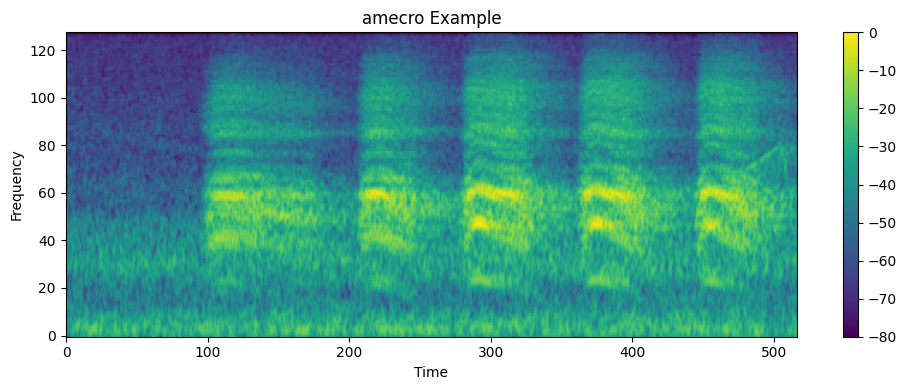

In [ ]:
# Loading HDF5 file
file_path = "/content/drive/My Drive/bird_spectrograms.hdf5"
f = h5py.File(file_path, 'r')

# Listing species keys:
species_keys = list(f.keys())
print("Species in dataset:", species_keys)

# Viewing shape of a single species:
example_key = species_keys[0]
dset = f[example_key]
print(f"{example_key} shape: {dset.shape}")  #  (128, 517, N)

def plot_spectrogram(spec, title="Spectrogram"):
    plt.figure(figsize=(10, 4))
    plt.imshow(spec, aspect='auto', origin='lower', cmap='viridis')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# Plot of single species :
example_spec = f[example_key][:, :, 0]
plot_spectrogram(example_spec, title=f"{example_key} Example")


Part 1: Binary Classification


1.    Load and Format the Data : rewbla and whcspa




In [ ]:
def load_species_data(f, species_key):
    data = f[species_key][:]

    # Transposing data to (samples, height, width)
    data = np.transpose(data, (2, 0, 1))
    return data

# Load data
rewbla_data = load_species_data(f, 'rewbla')
whcspa_data = load_species_data(f, 'whcspa')

print("rewbla:", rewbla_data.shape)
print("whcspa:", whcspa_data.shape)

# Equalize sample sizes
min_samples = min(rewbla_data.shape[0], whcspa_data.shape[0])
rewbla_data = rewbla_data[:min_samples]
whcspa_data = whcspa_data[:min_samples]

# Labels: 0 for rewbla, 1 for whcspa
X = np.concatenate((rewbla_data, whcspa_data), axis=0)
y = np.array([0]*min_samples + [1]*min_samples)

print("Total samples:", X.shape[0])

# Normalizing the spectrograms
X = X / 255.0

# Adding channel dimension
X = X[..., np.newaxis]  # Shape becomes (samples, 128, 517, 1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train:", X_train.shape, "Test:", X_test.shape)


rewbla: (187, 128, 517)
whcspa: (91, 128, 517)
Total samples: 182
Train: (145, 128, 517, 1) Test: (37, 128, 517, 1)


Model 1 : Base : 5 mins

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
5/5 - 21s - 4s/step - accuracy: 0.4759 - loss: 2.5972 - val_accuracy: 0.4865 - val_loss: 0.7127
Epoch 2/15
5/5 - 33s - 7s/step - accuracy: 0.4828 - loss: 0.8115 - val_accuracy: 0.5135 - val_loss: 0.6872
Epoch 3/15
5/5 - 32s - 6s/step - accuracy: 0.5448 - loss: 0.6832 - val_accuracy: 0.5676 - val_loss: 0.6896
Epoch 4/15
5/5 - 37s - 7s/step - accuracy: 0.5724 - loss: 0.6868 - val_accuracy: 0.4865 - val_loss: 0.6932
Epoch 5/15
5/5 - 21s - 4s/step - accuracy: 0.4966 - loss: 0.6979 - val_accuracy: 0.6216 - val_loss: 0.6917
Epoch 6/15
5/5 - 19s - 4s/step - accuracy: 0.4966 - loss: 0.6919 - val_accuracy: 0.6216 - val_loss: 0.6919
Epoch 7/15
5/5 - 21s - 4s/step - accuracy: 0.5586 - loss: 0.6827 - val_accuracy: 0.5946 - val_loss: 0.6917
Epoch 8/15
5/5 - 22s - 4s/step - accuracy: 0.5448 - loss: 0.6902 - val_accuracy: 0.5946 - val_loss: 0.6922
Epoch 9/15
5/5 - 18s - 4s/step - accuracy: 0.5379 - loss: 0.6920 - val_accuracy: 0.4865 - val_loss: 0.6932
Epoch 10/15
5/5 - 21s - 4s/step - acc

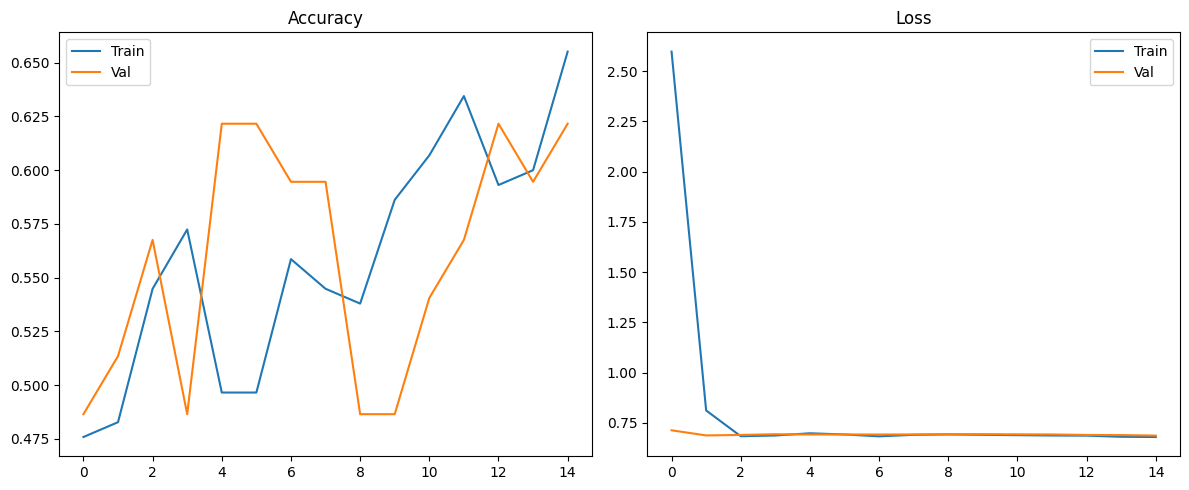

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step
              precision    recall  f1-score   support

      rewbla       0.65      0.58      0.61        19
      whcspa       0.60      0.67      0.63        18

    accuracy                           0.62        37
   macro avg       0.62      0.62      0.62        37
weighted avg       0.62      0.62      0.62        37

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


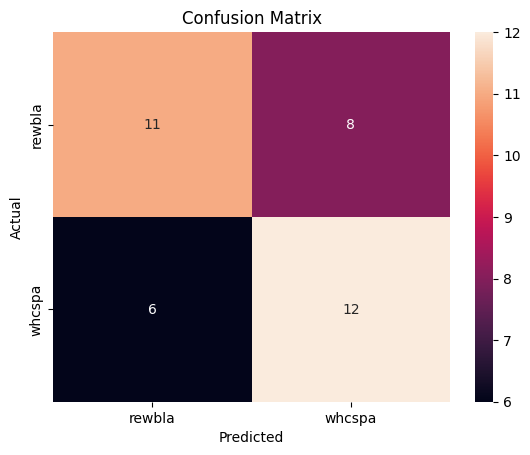

In [ ]:

def build_binary_model():
    model_binbase = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(128, 517, 1)),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary output
    ])
    model_binbase.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model_binbase

model_binbase = build_binary_model()

history_binbase = model_binbase.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    verbose=2
)

# Print final train and validation accuracy/loss
binbase_train_acc = history_binbase.history['accuracy'][-1]
binbase_train_loss = history_binbase.history['loss'][-1]
binbase_val_acc = history_binbase.history['val_accuracy'][-1]
binbase_val_loss = history_binbase.history['val_loss'][-1]

print(f"\n Final Training Accuracy: {binbase_train_acc:.4f}, Loss: {binbase_train_loss:.4f}")
print(f" Final Validation Accuracy: {binbase_val_acc:.4f}, Loss: {binbase_val_loss:.4f}")


def plot_training(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training(history_binbase)



# Predict
y_pred = (model_binbase.predict(X_test) > 0.5).astype(int).flatten()

# Report
print(classification_report(y_test, y_pred, target_names=['rewbla', 'whcspa']))


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['rewbla', 'whcspa'], yticklabels=['rewbla', 'whcspa'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




Model 2 : Increment of Dropout - 5mins

Epoch 1/15
5/5 - 21s - 4s/step - accuracy: 0.4759 - loss: 2.3318 - val_accuracy: 0.5135 - val_loss: 0.8029
Epoch 2/15
5/5 - 22s - 4s/step - accuracy: 0.5379 - loss: 0.9670 - val_accuracy: 0.4865 - val_loss: 0.6917
Epoch 3/15
5/5 - 19s - 4s/step - accuracy: 0.5310 - loss: 0.7000 - val_accuracy: 0.4865 - val_loss: 0.6916
Epoch 4/15
5/5 - 21s - 4s/step - accuracy: 0.5034 - loss: 0.6877 - val_accuracy: 0.4865 - val_loss: 0.6916
Epoch 5/15
5/5 - 21s - 4s/step - accuracy: 0.5034 - loss: 0.6826 - val_accuracy: 0.4865 - val_loss: 0.6879
Epoch 6/15
5/5 - 20s - 4s/step - accuracy: 0.5034 - loss: 0.6863 - val_accuracy: 0.4865 - val_loss: 0.6851
Epoch 7/15
5/5 - 21s - 4s/step - accuracy: 0.5310 - loss: 0.6694 - val_accuracy: 0.5135 - val_loss: 0.6865
Epoch 8/15
5/5 - 20s - 4s/step - accuracy: 0.5241 - loss: 0.6507 - val_accuracy: 0.5676 - val_loss: 0.6659
Epoch 9/15
5/5 - 21s - 4s/step - accuracy: 0.5655 - loss: 0.6532 - val_accuracy: 0.6216 - val_loss: 0.6718
Epoch 10/15
5/5 - 30s - 6s/step - acc

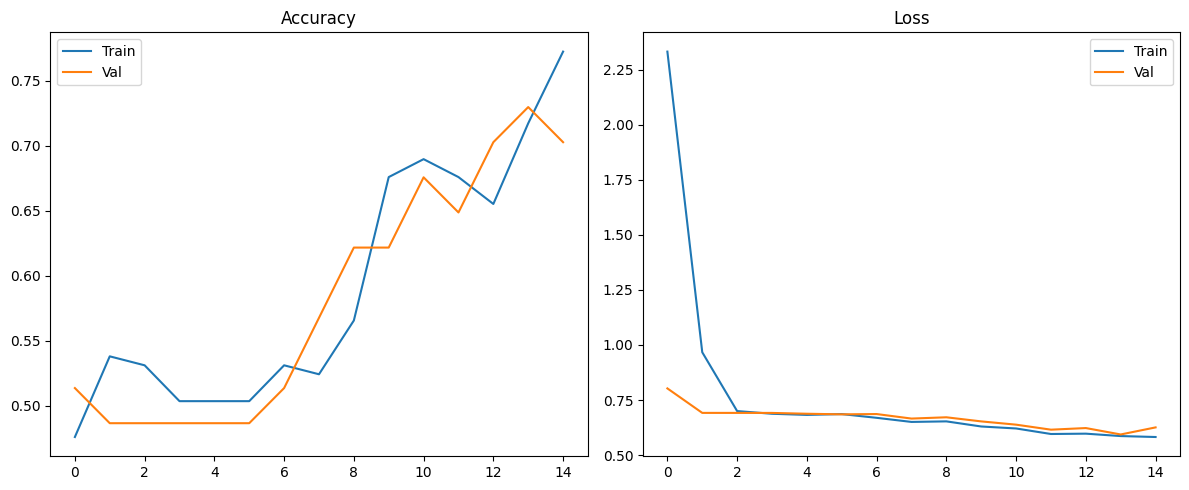

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step
              precision    recall  f1-score   support

      rewbla       0.70      0.84      0.76        19
      whcspa       0.79      0.61      0.69        18

    accuracy                           0.73        37
   macro avg       0.74      0.73      0.72        37
weighted avg       0.74      0.73      0.73        37



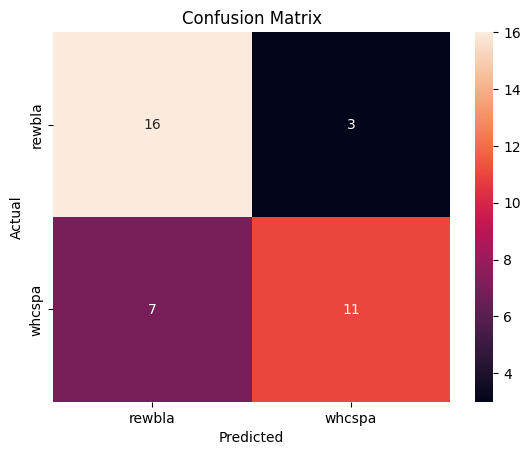

In [ ]:
# Model with increased dropout
model_bindrop = Sequential([
    Input(shape=(128, 517, 1)),  # Spectrogram shape
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  #  Dropout after first conv block

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  #  Dropout after second conv block

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  #  Heavy dropout before final layer

    Dense(1, activation='sigmoid')
])

model_bindrop.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train model
history = model_bindrop.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
                    verbose=2)


# Print final train and validation accuracy/loss
bindrop_train_acc = history.history['accuracy'][-1]
bindrop_train_loss = history.history['loss'][-1]
bindrop_val_acc = history.history['val_accuracy'][-1]
bindrop_val_loss = history.history['val_loss'][-1]

print(f"\n Training Accuracy: {bindrop_train_acc:.4f}, Loss: {bindrop_train_loss:.4f}")
print(f"  Validation Accuracy: {bindrop_val_acc:.4f}, Loss: {bindrop_val_loss:.4f}")

def plot_training(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training(history)


# Predict
y_pred = (model_bindrop.predict(X_test) > 0.5).astype(int).flatten()

# Report
print(classification_report(y_test, y_pred, target_names=['rewbla', 'whcspa']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['rewbla', 'whcspa'], yticklabels=['rewbla', 'whcspa'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Model 3 : Improving and increasing the epochs and change of batch size -31 secs

Epoch 1/50
10/10 - 30s - 3s/step - accuracy: 0.5172 - loss: 1.0510 - val_accuracy: 0.4865 - val_loss: 0.6926
Epoch 2/50
10/10 - 32s - 3s/step - accuracy: 0.5310 - loss: 0.6900 - val_accuracy: 0.4865 - val_loss: 0.6912
Epoch 3/50
10/10 - 20s - 2s/step - accuracy: 0.5103 - loss: 0.6840 - val_accuracy: 0.4865 - val_loss: 0.6879
Epoch 4/50
10/10 - 28s - 3s/step - accuracy: 0.4828 - loss: 0.6801 - val_accuracy: 0.5405 - val_loss: 0.6809
Epoch 5/50
10/10 - 32s - 3s/step - accuracy: 0.6414 - loss: 0.6668 - val_accuracy: 0.5135 - val_loss: 0.6809
Epoch 6/50
10/10 - 21s - 2s/step - accuracy: 0.6759 - loss: 0.6377 - val_accuracy: 0.6216 - val_loss: 0.6484
Epoch 7/50
10/10 - 20s - 2s/step - accuracy: 0.6759 - loss: 0.6460 - val_accuracy: 0.5946 - val_loss: 0.6696
Epoch 8/50
10/10 - 21s - 2s/step - accuracy: 0.6483 - loss: 0.6391 - val_accuracy: 0.6757 - val_loss: 0.6423
Epoch 9/50
10/10 - 20s - 2s/step - accuracy: 0.6276 - loss: 0.6205 - val_accuracy: 0.6757 - val_loss: 0.6260
Epoch 10/50
10/10 -

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step

 Classification Report:
              precision    recall  f1-score   support

      rewbla       0.79      0.79      0.79        19
      whcspa       0.78      0.78      0.78        18

    accuracy                           0.78        37
   macro avg       0.78      0.78      0.78        37
weighted avg       0.78      0.78      0.78        37



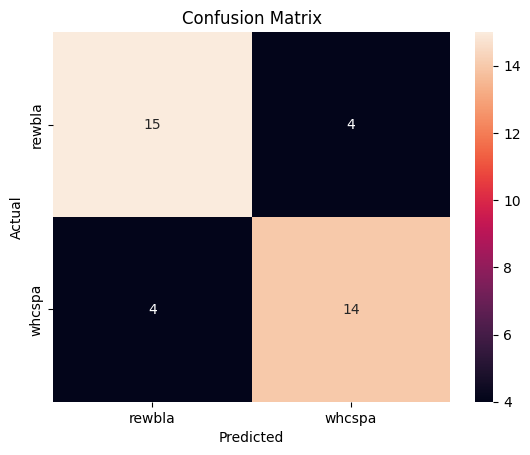

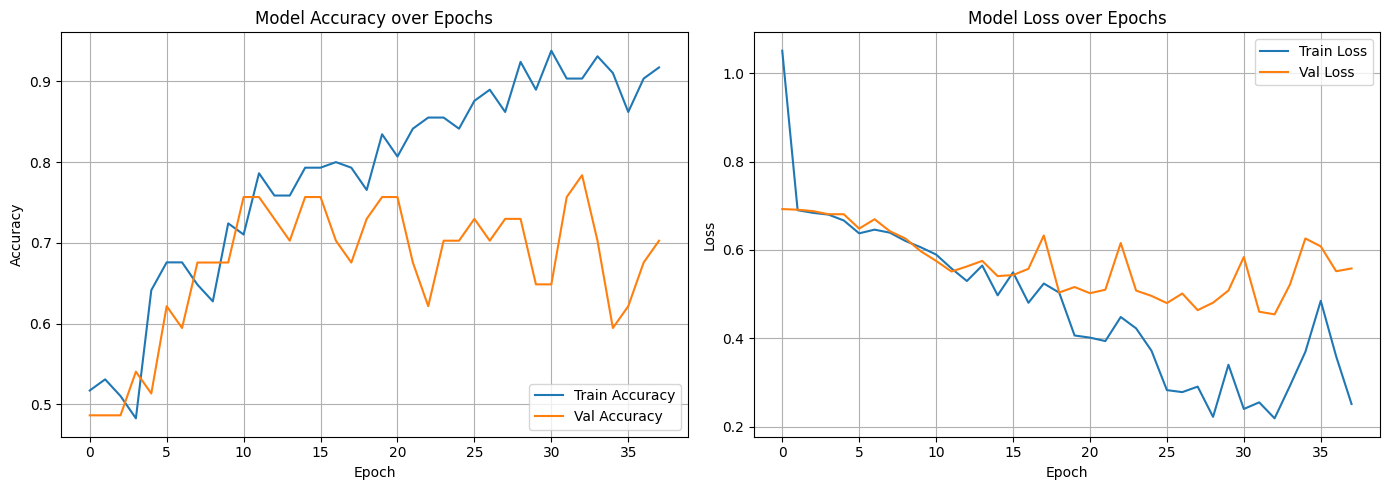

In [ ]:
# Changing batch size and epochs
batch_size = 16
epochs = 50

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Building the model
binepoch_model = Sequential([
    Input(shape=(128, 517, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
binepoch_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = binepoch_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=2
)

# Final Accuracy
binepoch_train_acc = history.history['accuracy'][-1]
binepoch_train_loss = history.history['loss'][-1]
binepoch_val_acc = history.history['val_accuracy'][-1]
binepoch_val_loss = history.history['val_loss'][-1]
print(f"\n Final Training Accuracy: {binepoch_train_acc:.4f}, Loss: {binepoch_train_loss:.4f}")
print(f" Final Validation Accuracy: {binepoch_val_acc:.4f}, Loss: {binepoch_val_loss:.4f}")

# Evaluate on test data
y_pred_probs = binepoch_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=['rewbla', 'whcspa']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['rewbla', 'whcspa'], yticklabels=['rewbla', 'whcspa'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


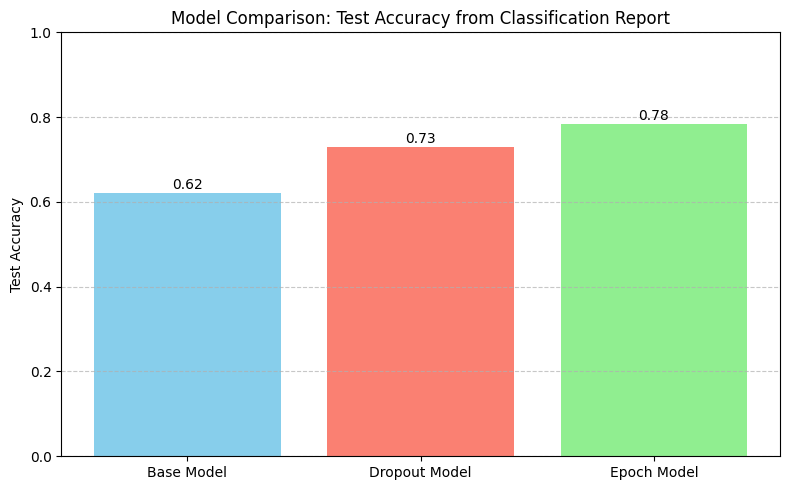

In [ ]:
# For each model
binbase_test_acc = accuracy_score(y_test, (model_binbase.predict(X_test) > 0.5).astype(int).flatten())
bindrop_test_acc = accuracy_score(y_test, (model_bindrop.predict(X_test) > 0.5).astype(int).flatten())
binepoch_test_acc = accuracy_score(y_test, (binepoch_model.predict(X_test) > 0.5).astype(int).flatten())

# Model names and test accuracies from classification report
model_names = ['Base Model', 'Dropout Model', 'Epoch Model']
test_accuracies = [binbase_test_acc, bindrop_test_acc, binepoch_test_acc]

# Bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, test_accuracies, color=['skyblue', 'salmon', 'lightgreen'])

# Bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}', ha='center')

# Plot
plt.ylim(0, 1)
plt.ylabel('Test Accuracy')
plt.title('Model Comparison: Test Accuracy from Classification Report')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
